## QuTiP example: Physical implementation of Spin Chain Qubit model / Пример QuTiP: Физическая реализация модели Spin Chain Qubit

In [1]:
%matplotlib inline

In [2]:
from qutip.qip.circuit import QubitCircuit
from qutip.qip.operations import gate_sequence_product
import numpy as np

In [4]:
from qutip.qip.device import CircularSpinChain, LinearSpinChain
from qutip.qip.noise import RandomNoise

## Hamiltonian:

$\displaystyle H = - \frac{1}{2}\sum_n^N h_n \sigma_z(n) - \frac{1}{2} \sum_n^{N-1} [ J_x^{(n)} \sigma_x(n) \sigma_x(n+1) + J_y^{(n)} \sigma_y(n) \sigma_y(n+1) +J_z^{(n)} \sigma_z(n) \sigma_z(n+1)]$

The linear and circular spin chain models employing the nearest neighbor interaction can be implemented using the SpinChain class. 

Модели линейных и круговых спиновых цепочек, использующие взаимодействие ближайших соседей, могут быть реализованы с помощью класса SpinChain.

## Circuit Setup / Настройка схемы

In [6]:
N = 3
qc = QubitCircuit(N)

qc.add_gate("CNOT", targets=[0], controls=[2])


The non-adjacent interactions are broken into a series of adjacent ones by the program automatically. 

Несмежные взаимодействия автоматически разбиваются программой на серию смежных.

In [7]:
U_ideal = gate_sequence_product(qc.propagators())

U_ideal

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

## Circular Spin Chain Model Implementation / Реализация модели круговой спиновой цепочки

In [12]:
p1 = CircularSpinChain(N, correct_global_phase=True)

U_list = p1.run(qc)

U_physical = gate_sequence_product(U_list)

U_physical.tidyup(atol=1e-5)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

In [13]:
(U_ideal - U_physical).norm()

0.0

The results obtained from the physical implementation agree with the ideal result.

Результаты, полученные при физической реализации, согласуются с идеальным результатом.

In [14]:
p1.qc0.gates

[Gate(CNOT, targets=[0], controls=[2])]

They are then converted into the basis [ISWAP, RX, RZ].

Затем они преобразуются в основу [ISWAP, RX, RZ]

In [15]:
p1.qc2.gates

[Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[2, 0], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RX, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(ISWAP, targets=[2, 0], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RZ, targets=[0], controls=None)]

The time for each applied gate:

Время для каждого примененного гейта:

In [16]:
p1.get_full_tlist()

array([0.   , 1.25 , 1.375, 1.5  , 2.   , 2.125, 2.25 , 3.5  , 3.625,
       4.125, 4.25 , 4.375])

The pulse can be plotted as:

Импульс можно изобразить как:

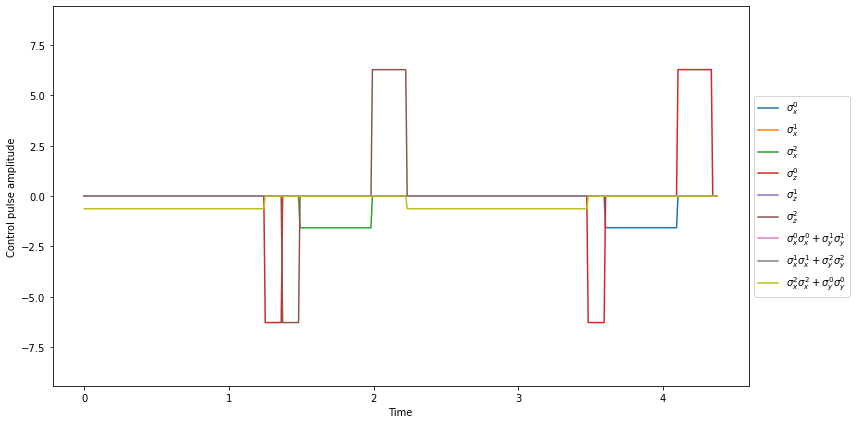

In [17]:
p1.plot_pulses();

## Linear Spin Chain Model Implementation / Реализация модели линейной спиновой цепи

In [18]:
p2 = LinearSpinChain(N, correct_global_phase=True)

U_list = p2.run(qc)

U_physical = gate_sequence_product(U_list)

U_physical.tidyup(atol=1e-5)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

In [19]:
(U_ideal - U_physical).norm()

0.0

The results obtained from the physical implementation agree with the ideal result.

Результаты, полученные при физической реализации, согласуются с идеальным результатом.

In [21]:
p2.qc0.gates

[Gate(CNOT, targets=[0], controls=[2])]

The gates are first convert to gates with adjacent interactions moving in the direction with the least number of qubits in between.

Гейты сначала преобразуются в ворота, при этом смежные взаимодействия движутся в направлении с наименьшим количеством кубитов между ними.

In [22]:
p2.qc1.gates

[Gate(SWAP, targets=[0, 1], controls=None),
 Gate(CNOT, targets=[1], controls=[2]),
 Gate(SWAP, targets=[0, 1], controls=None)]

They are then converted into the basis [ISWAP, RX, RZ].

Затем они преобразуются в основу [ISWAP, RX, RZ]

In [23]:
p2.qc2.gates

[Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[1], controls=None),
 Gate(ISWAP, targets=[1, 0], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[2, 1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RX, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(ISWAP, targets=[2, 1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(RX, targets=[1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[1], controls

The time for each applied gate:
    
Время для каждого примененного гейта:

In [24]:
p2.get_full_tlist()

array([ 0.   ,  1.25 ,  1.75 ,  3.   ,  3.5  ,  4.75 ,  5.25 ,  6.5  ,
        6.625,  6.75 ,  7.25 ,  7.375,  7.5  ,  8.75 ,  8.875,  9.375,
        9.5  ,  9.625, 10.875, 11.375, 12.625, 13.125, 14.375, 14.875])

The pulse can be plotted as:
    

Импульс можно изобразить как:

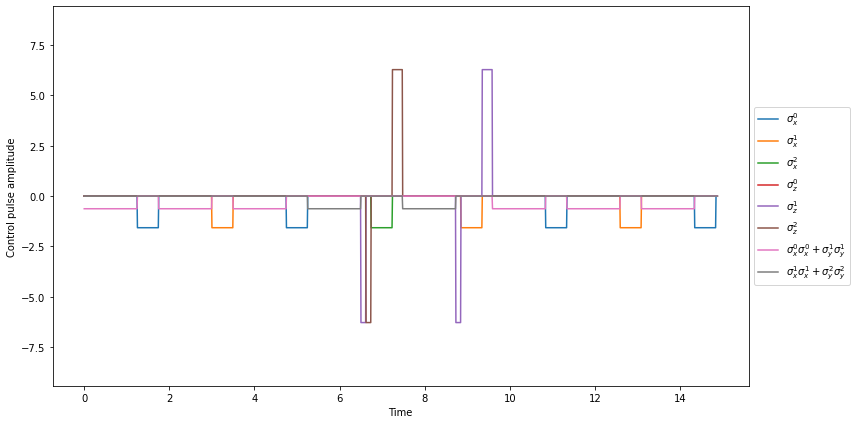

In [25]:
p2.plot_pulses();

## Numerical simulation

From QuTiP 4.5, we also add the possibility to allow numerical simulation of SpinChain-based quantum computing. One needs only to add an option analytical=False in run_state to use one of the QuTiP solvers to simulate the state evolution instead of direct matrix product. Under numerical simulation, one can go beyond simulation with perfect gate operations. All the noise defined for the class Processor can also be used for SpinChain here.

Начиная с QuTiP 4.5, мы также добавляем возможность численного моделирования квантовых вычислений на основе SpinChain. Достаточно только добавить опцию аналитический = False в run_state, чтобы использовать один из решателей QuTiP для моделирования эволюции состояния вместо прямого матричного произведения. При численном моделировании можно выйти за рамки моделирования с идеальными операциями затвора. Здесь весь шум, определенный для класса Processor, можно использовать и для SpinChain.

In [26]:
from qutip import basis, fidelity
N = 1
plus_state = (basis(2,0) + basis(2,1)).unit()

qc = QubitCircuit(N=N)
qc.add_gate("SNOT", targets=0)
processor = LinearSpinChain(N=N)
processor.load_circuit(qc)
end_state = processor.run_state(init_state=basis(2, 0), analytical=False).states[-1]
fidelity(end_state, plus_state)

1.0000000052671834

In [27]:
processor.add_noise(RandomNoise(rand_gen=np.random.normal, dt=0.1, loc=0.1, scale=0.2))
end_state = processor.run_state(init_state=basis(2, 0), analytical=False).states[-1]
fidelity(end_state, plus_state)

0.9975894194228081

As the control noise is coherent noise, the result of this noise is still a pure state. Therefore, we can visualize it on a Bloch sphere.


Поскольку управляющий шум является когерентным шумом, результат этого шума остается чистым. Следовательно, мы можем визуализировать его на сфере Блоха.

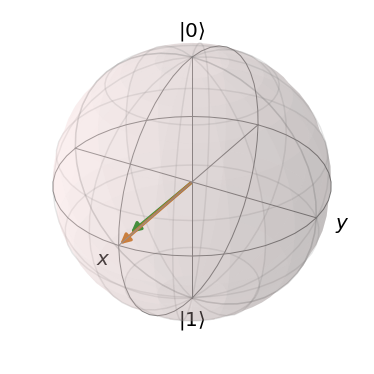

In [28]:
from qutip.bloch import Bloch
b = Bloch()
b.add_states([end_state, plus_state])
b.make_sphere()

## Software versions:

In [29]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.5.2
Numpy,1.18.5
SciPy,1.5.0
matplotlib,3.2.2
Cython,0.29.21
Number of CPUs,6
BLAS Info,INTEL MKL
IPython,7.16.1
Python,"3.8.3 (default, Jul 2 2020, 11:26:31) [Clang 10.0.0 ]"
OS,posix [darwin]
